# Q1 part 1

$$ p(\theta) = \frac{1}{\sqrt{2\pi\sigma_0^2}} \exp\left(-\frac{(\theta - \mu_0)^2}{2\sigma_0^2}\right)$$
For $n$ independent observations $x_1, x_2, \ldots, x_n$:
$$
p(x | \theta) = \prod_{i=1}^{n} p(x_i | \theta) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \theta)^2}{2\sigma^2}\right)
$$
$$ p(x | \theta) = \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \theta)^2 \right)
$$
By Bayes' theorem:
$$
p(\theta | x) \propto p(x | \theta) p(\theta)
$$
$$
p(\theta | x) \propto \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \theta)^2 \right) \exp\left(-\frac{(\theta - \mu_0)^2}{2\sigma_0^2}\right)
$$
$$
p(\theta | x) \propto \exp\left(-\frac{1}{2} \left(\left(\frac{n}{\sigma^2} + \frac{1}{\sigma_0^2}\right) \theta^2 - 2\theta \left(\frac{\sum_{i=1}^{n} x_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right) + \text{c} \right) \right)
$$
Both The distribution for X and $\theta$ are $\mathcal{N}$ so the Bayesian update will also be $\mathcal{N}$
$$
\theta | x \sim \mathcal{N}(\mu_n, \sigma_n^2)
$$

where:
$$
\mu_n = \frac{\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^{n} x_i}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}
$$
$$
\sigma_n^2 = \left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right)^{-1}
$$


Substituting $\mu_0 $=5,$\sigma_0^2 $  =9 ,$\sigma^2 $=4,n=1,$x_i$=6
$$we\ get\ \ \mu_n=\frac{74}{13},\sigma_n^2 =\frac{36}{13} $$
$$
\theta | x \sim \mathcal{N}(\frac{74}{13}, \frac{36}{13})
$$
$$Hence Proved$$

# Q1 part 2

For Part 2 we have $\mu_0 $=5,$\sigma_0^2 $  =$\sigma^2 $=4  ,$\sum_{i=1}^{n}=\bar{x}*n$



$$
\mu_n = \frac{\frac{5}{4} + \frac{\bar{x}*n}{4}}{\frac{1}{4} + \frac{n}{4}}=\frac{5+\bar{x}n}{1+n}
$$
$$
\sigma_n^2 = \left(\frac{1}{4} + \frac{n}{4}\right)^{-1}=\frac{4}{1+n}
$$

# Q1 part 3

As more data is received the value of n increases the dominance of $\bar{x}$ in the formula of mean which makes the mean tend more towards $\bar{x}$ 
Also as n increases, we have a variance decrease which indicates that the distribution is coming close to the mean which is good for the signal interpretation
sending the same signal multiple times increases the dominance of $\bar{x}$ in the formula of mean and variance decreases which is good for signals 

# Q1 part 4 subpart 1

$$\mu_{prior} =100,\ \sigma_{prior}^2=152,\ \sigma^2=100,n=1\ for\ one\ sample $$
$$\ \bar{x}=x=80 $$
$$
True\ IQ=\mu_n = \frac{\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^{n} x_i}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}
$$
On calculating we get True IQ =87.9

# Q1 part 4 subpart 2

$$\bar{x}=x=150 $$
On calculating we get True IQ =130.15

# Q2

Likelihood Function
$$
L(\mu,\sigma^2 | X)  = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i -\mu)^2}{2\sigma^2}\right)
$$
Log Likelihood Function
$$
l(\mu,\sigma^2 | X)  = -\frac{n}{2}log(2\pi \sigma^2)-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2
$$
Upon maximising this function we get 
$$ 
\hat{\mu}=\frac{\sum_{i=1}^nx_i}{n}$$
$$
\hat{\sigma}^2=\frac{\sum_{i=1}^n(x_i-\mu)^2}{n}
$$

In [11]:
#Python Implementation
import numpy as np
import random
a=np.random.random(1000)*10
mu_cap=np.sum(a)/1000
sigma_2=np.sum((a-mu_cap)**2)/1000
print("mean=",mu_cap,"variance=",sigma_2)

mean= 5.0289761835053035 variance= 8.099688319597567


# Q3

In [29]:

def sig(x):
    return 1 / (1 + np.exp(-x))

def map(theta, x, mu, sigma, y):
    z = np.dot(x, theta)  
    log_likelihood_1 = np.sum(y*np.log(sig(z)) + (1-y)*np.log(1-sig(z)))
    log_prior = -0.5 * np.sum(((theta-mu)/sigma)**2) - (len(theta)/2) * np.log(2 * math.pi * sigma**2)
    return log_likelihood_1 + log_prior

def neg_map(theta, x, mu, sigma, y):
    return -map(theta, x, mu, sigma, y)

In [30]:
import numpy as np
import math
from scipy.optimize import minimize

N = 500
X = np.random.randn(N, 3)
t_theta = np.array([-0.75, 1.25, 1.8])

y1 = (np.random.rand(N) < sig(np.dot(X, t_theta))).astype(int)

mu_prior = np.zeros(X.shape[1])
sigma_prior = 16
starting_guess_1 = np.zeros(X.shape[1])

result = minimize(neg_map, starting_guess_1, args=(X, mu_prior, sigma_prior, y1))
estimated_theta = result.x

print("Estimated Parameters: ", estimated_theta)

Estimated Parameters:  [-0.77697479  1.42627835  1.73984789]


# Q4

# Q5 part 1

$$ D_{\text{KL}}(P \parallel Q) = \int_{-\infty}^{\infty} p(x) \log \frac{p(x)}{q(x)} \, dx$$

$$ D_{\text{KL}}(P \parallel Q) = \int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi \sigma_1^2}} \exp \left( -\frac{(x - \mu_1)^2}{2 \sigma_1^2} \right) \log \left( \frac{\frac{1}{\sqrt{2 \pi \sigma_1^2}} \exp \left( -\frac{(x - \mu_1)^2}{2 \sigma_1^2} \right)}{\frac{1}{\sqrt{2 \pi \sigma_2^2}} \exp \left( -\frac{(x - \mu_2)^2}{2 \sigma_2^2} \right)} \right) \, dx$$

$$ D_{\text{KL}}(P \parallel Q) = \int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi \sigma_1^2}} \exp \left( -\frac{(x - \mu_1)^2}{2 \sigma_1^2} \right) \left[ \log \frac{\sigma_2}{\sigma_1} - \frac{(x - \mu_1)^2}{2 \sigma_1^2} + \frac{(x - \mu_2)^2}{2 \sigma_2^2} \right] \, dx$$

$$Simplifying\ we\ get:$$
$$D_{\text{KL}}(P \parallel Q) = \log \frac{\sigma_2}{\sigma_1} + \frac{\sigma_1^2 + (\mu_1 - \mu_2)^2}{2 \sigma_2^2} - \frac{1}{2}
$$

# Q5 part 2

In [31]:
import pandas as pd
import math
file_path = 'data_KL.csv'
data = pd.read_csv(file_path)

In [32]:
data

,Unnamed: 0,P,Q
0,0,7.888609e-31,1.486720e-07
1,1,7.888609e-29,2.438962e-07
2,2,3.904861e-27,3.961301e-07
3,3,1.275588e-25,6.369829e-07
4,4,3.093301e-24,1.014086e-06
...,...,...,...
95,95,5.939138e-23,1.598375e-06
96,96,3.093301e-24,1.014086e-06
97,97,1.275588e-25,6.369829e-07
98,98,3.904861e-27,3.961301e-07


In [33]:
P = data['P'].values
Q = data['Q'].values

In [34]:
def normalize(distribution):
    total = sum(distribution)
    return [x / total for x in distribution]

P = normalize(P)
Q = normalize(Q)

In [35]:
def kl_divergence(P, Q):
    return sum(p * math.log(p / q) for p, q in zip(P, Q) if p != 0 and q != 0)

kl_divpq = kl_divergence(P, Q)
kl_divqp = kl_divergence(Q, P)

print("KL Divergence (P || Q):", kl_divpq)
print("KL Divergence (Q || P):", kl_divqp)


KL Divergence (P || Q): 0.31815510041414474
KL Divergence (Q || P): 0.8319068251266678


# Q5 part 3


The Kullback-Leibler (KL) divergence is a measure of how one probability distribution diverges from a second, expected probability distribution. It is not symmetric, meaning 
$D_{KL}(P||Q)\neq D_{KL}(Q||P) $
Thus, it is not a true "distance" metric in the mathematical sense (e.g., it does not satisfy the triangle inequality).

KL Divergence represents the amount of information lost when 
Q is used to approximate 
P. In other words, it quantifies the inefficiency of assuming that the distribution 
Q is the true distribution when the actual distribution is 
P.

# Q6 part 1

In [36]:
df =pd.read_csv("data_open.csv",names=['x','y'])

In [37]:
df

,x,y
0,NaN,data
1,0.0,5.242409064737171
2,1.0,1.5677360608794515
3,2.0,-5.809161571554837
4,3.0,-3.2231270533908565
...,...,...
7996,7995.0,10.475467099026911
7997,7996.0,5.479538126822994
7998,7997.0,4.3477536134189165
7999,7998.0,2.279800010468329


In [38]:
x=df["x"][1:].to_numpy().astype(float)
y=df["y"][1:].to_numpy().astype(float)


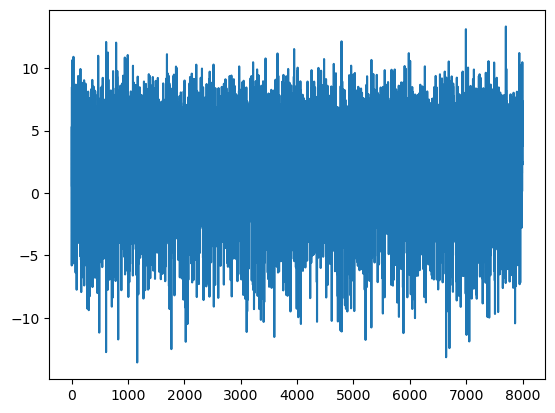

In [39]:
import matplotlib.pyplot as plt
plt.plot(x,y)

# Q6 part 2